In [1]:
## Step 1: Mount Google Drive (for accessing dataset and saving the model)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Step 2: Import Necessary Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
## Step 3: Set Dataset Path from Google Drive
dataset_path = '/content/drive/MyDrive/Diseas'

In [4]:
## Step 4: Data Preprocessing
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Pixel values ko 0-1 range me normalize kiya
    rotation_range=20,          # Image rotate karne ka range 20 degrees
    width_shift_range=0.2,      # Image horizontal shift
    height_shift_range=0.2,     # Image vertical shift
    shear_range=0.2,            # Shear transformation
    zoom_range=0.2,             # Zoom transformation
    horizontal_flip=True,       # Random horizontal flip
    validation_split=0.2        # 80% training, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
     color_mode='rgb',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
     color_mode='rgb',
    subset='validation'
)

Found 4747 images belonging to 4 classes.
Found 1185 images belonging to 4 classes.


In [5]:
# create CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(150,150,3))) # Changed input_shape to (150, 150, 3)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax')) #change to 3 and activation to softmax

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Initialize model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,164 (4.62 MB)

 Trainable params: 1,211,972 (4.62 MB)

 Non-trainable params: 192 (768.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1335s 9s/step - accuracy: 0.6675 - loss: 1.0882 - val_accuracy: 0.2861 - val_loss: 4.1438
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 356ms/step - accuracy: 0.8021 - loss: 0.5524 - val_accuracy: 0.3316 - val_loss: 3.7360
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 54s 360ms/step - accuracy: 0.8740 - loss: 0.3480 - val_accuracy: 0.5772 - val_loss: 1.9480
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 355ms/step - accuracy: 0.8852 - loss: 0.3186 - val_accuracy: 0.8911 - val_loss: 0.2909
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 354ms/step - accuracy: 0.8933 - loss: 0.2792 - val_accuracy: 0.9013 - val_loss: 0.2620
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 353ms/step - accuracy: 0.9192 - loss: 0.2189 - val_accuracy: 0.7224 - val_loss: 1.0392
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 358ms/step - accuracy: 0.9368 - loss: 0.1765 - val_accuracy: 0.7544 - val_loss: 1.0255
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 357ms/step - accuracy: 0.9395 - loss: 0.

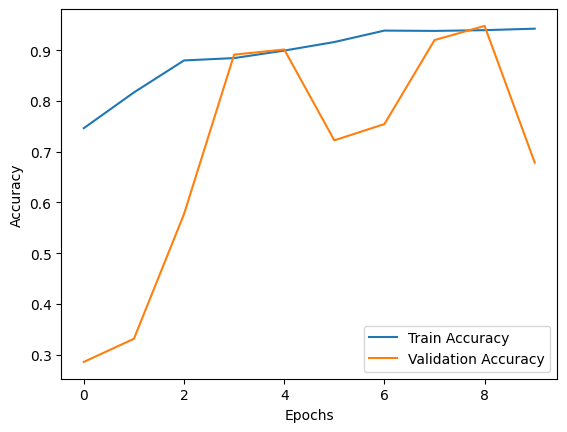

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

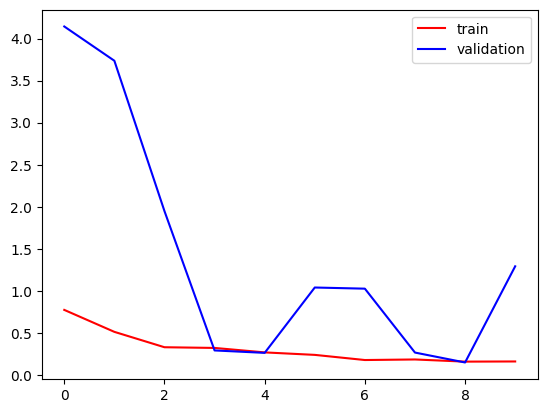

In [11]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [12]:
model.save("/content/drive/MyDrive/paddy_leaf_disease_model.keras")

In [13]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/paddy_leaf_disease_model.keras")

In [14]:
## Step 10: Make Predictions
import random
from tensorflow.keras.preprocessing import image

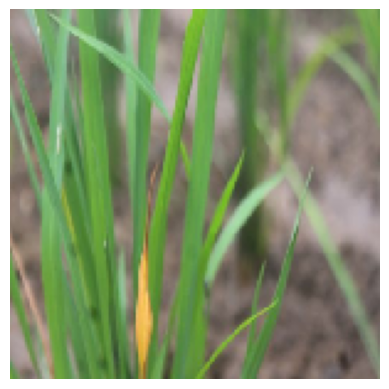

In [21]:
# Select a random image from validation set
random_image_path = random.choice(val_generator.filepaths)
img = image.load_img(random_image_path, target_size=image_size)
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
# Preprocess the image
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

In [23]:
# Predict
y_pred = model.predict(img_array)
pred_class = np.argmax(y_pred)
print(f"Predicted Class: {list(train_generator.class_indices.keys())[pred_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Tungro
